<a href="https://colab.research.google.com/github/AstroBoy1/sklearn_examples/blob/master/Copy_of_sklearn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# This notebook provides an example of how to use sklearn classifiers.
# Loads data from train_data.csv.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import plot
# For more details see https://scikit-learn.org/stable/modules/linear_model.html

# Load data.
data_url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv'
localfile = np.DataSource(destpath='./').open(data_url).name
print(localfile)
data = np.loadtxt(localfile, skiprows=1, delimiter=',')
Y = data[:, 0] 
X = data[:, 1:]

# Plot features. 
# feature_names = ['age', 'income', 'exercise', 'diet']
# for i in range(X.shape[1]):
#     plt.figure(i)
#     plt.hist(X[Y==0, i], label='Class 0', alpha=0.3)
#     plt.hist(X[Y==1, i], label='Class 1', alpha=0.3)
#     plt.title(feature_names[i])
#     plt.legend()
### Classifier 

# Preprocess data.
X[:, 0] /= 100. 
X[:, 1] /= 100000.

#X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=3)

# Divide data into train and validation set.
N_train, N_valid = 900, 100
X_train, X_valid = X[0:N_train, :], X[N_train:, :]
y_train, y_valid = Y[0:N_train], Y[N_train:]

neighbors = list(range(1, 100))
train_accuracy = []
valid_accuracy = []

# Define a classifier model. (Lots of options to choose from.)
#clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
#        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
#clf = linear_model.RidgeClasfier(alpha=0.1)
for n in neighbors:
  clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', p=2, metric='euclidean')
  #clf = SVC(degree=4, random_state=0, kernel="rbf")
  #clf = MLPClassifier(hidden_layer_sizes=(256, 256), activation='tanh', solver='sgd', alpha=0.0001, batch_size=10, momentum=0.9, learning_rate="adaptive", learning_rate_init=0.001, max_iter = 10000000, early_stopping=True)

  # Fit/train/learn.
  clf.fit(X_train, y_train)

  # Compute accuracy on training data.
  accuracy_train = clf.score(X_train, y_train)
  #print(f'Training accuracy: {accuracy_train:0.2}')
  train_accuracy.append(accuracy_train)

  # Compute accuracy on validation data.
  y_predicted = clf.predict(X_valid)
  accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
  valid_accuracy.append(accuracy_valid)
  #print(f'Validation accuracy: {accuracy_valid:0.2}')
  #print('Validation predictions: ', y_predicted)

#print('Coefficients: ', clf.coef_, clf.intercept_)

/content/raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/training_data.csv


<Figure size 432x288 with 0 Axes>

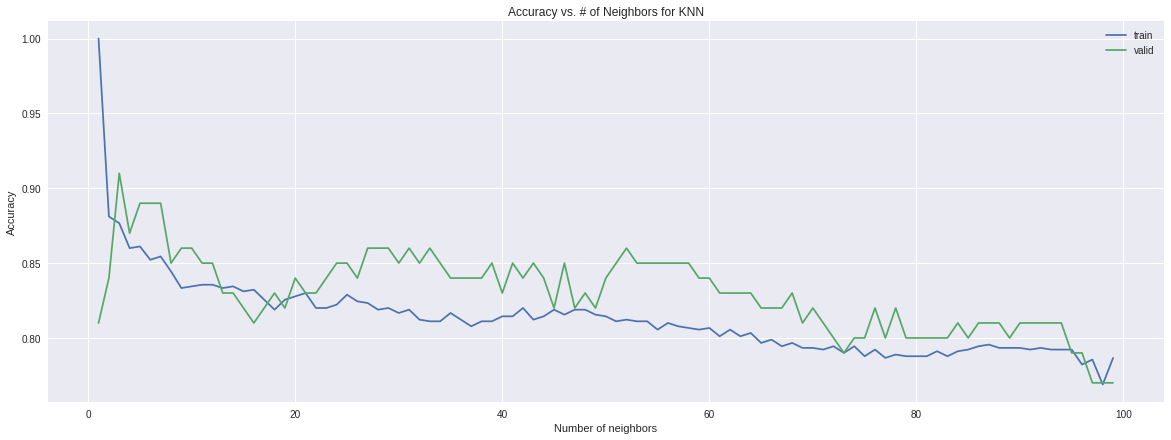

In [147]:
from matplotlib import pyplot as plt
fig = plt.figure()
from matplotlib.pyplot import figure
figure(figsize=(20, 7))
plt.plot(neighbors, train_accuracy, label='train')
plt.plot(neighbors, valid_accuracy, label='valid')
plt.title("Accuracy vs. # of Neighbors for KNN")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [148]:
valid_accuracy.index(max(valid_accuracy))

2

In [149]:
valid_accuracy[2]

0.91

In [119]:
### Example of Cross-Validation
from sklearn.model_selection import cross_val_score
clf = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=0.1, 
        learning_rate='constant', eta0=0.01, max_iter=10000, tol=1e-6)
cv_scores = cross_val_score(clf, X, Y, cv=5)
print('Cross-validation accuracies: ', cv_scores)
print('Mean CV accuracy: %0.2f' % np.mean(cv_scores))

Cross-validation accuracies:  [0.70149254 0.705      0.67       0.695      0.64321608]
Mean CV accuracy: 0.68
